In [1]:
# Импортируем основные библиотеки для анализа данных и машинного обучения
import pandas as pd                  # Для работы с таблицами
import matplotlib.pyplot as plt      # Для визуализации графиков
import seaborn as sns                # Для более красивых графиков

# Импорт из scikit-learn
from sklearn.datasets import load_breast_cancer           # Датасет "рак груди"
from sklearn.model_selection import train_test_split      # Разделение на train/test
from sklearn.preprocessing import StandardScaler          # Нормализация признаков
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier         # Алгоритм KNN
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Другие модели


In [2]:
# Загружаем встроенный датасет Breast Cancer
data = load_breast_cancer()

# Преобразуем его в pandas-таблицу для удобной работы
df = pd.DataFrame(data.data, columns=data.feature_names)

# Добавим колонку target (целевая переменная — злокачественная или доброкачественная опухоль)
df['target'] = data.target

# Выведем первые 5 строк
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print(f"Размер таблицы: {df.shape}")
print("\nРаспределение целевой переменной:")
print(df['target'].value_counts())


Размер таблицы: (569, 31)

Распределение целевой переменной:
target
1    357
0    212
Name: count, dtype: int64


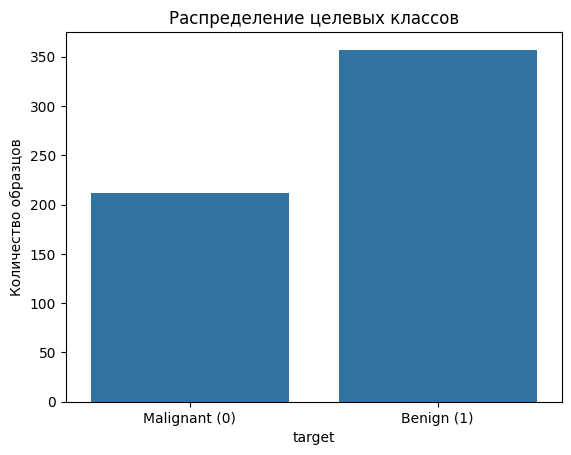

In [4]:
# Гистограмма распределения целевых меток (злокачественные / доброкачественные)
sns.countplot(x='target', data=df)
plt.title("Распределение целевых классов")
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])  # Переводим метки
plt.ylabel("Количество образцов")
plt.show()


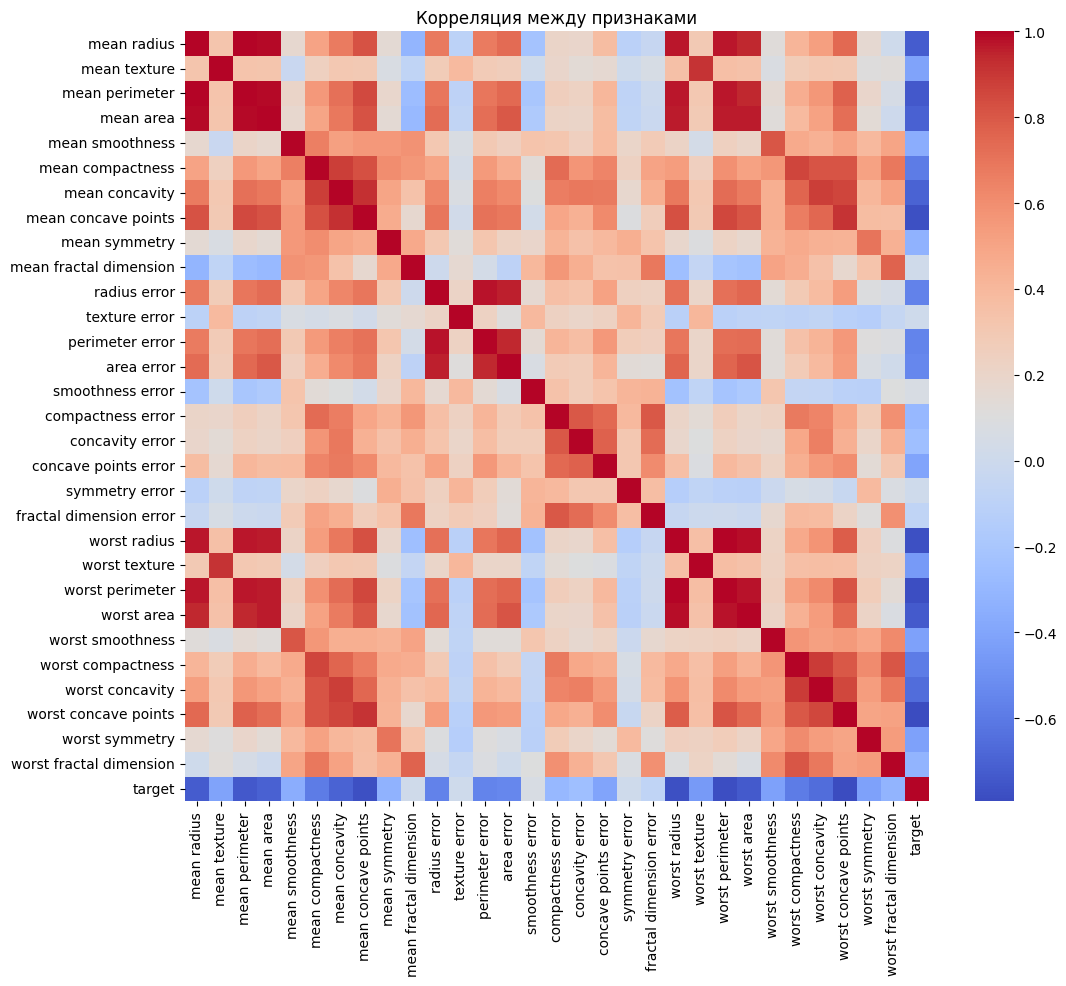

In [5]:
# Вычисляем корреляцию между признаками и визуализируем её
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Корреляция между признаками")
plt.show()


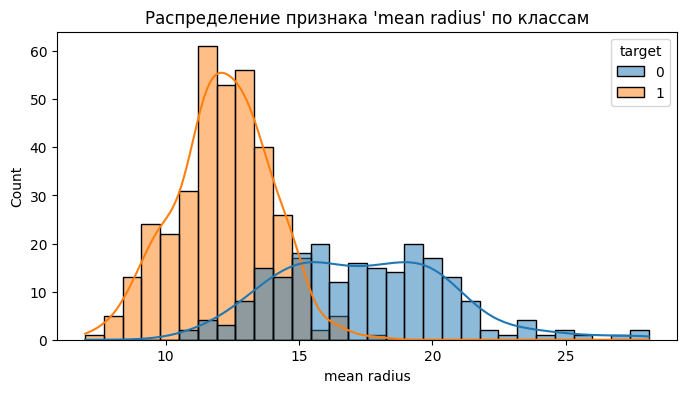

In [6]:
# Сравним распределение одного из признаков по классам
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='mean radius', hue='target', kde=True, bins=30)
plt.title("mean radius")
plt.show()


In [7]:
# X — все признаки (30 штук), y — целевая переменная (0 или 1)
X = df.drop('target', axis=1)
y = df['target']


In [8]:
# Делим данные: 80% — на обучение, 20% — на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверим размеры
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (455, 30)
Размер тестовой выборки: (114, 30)


In [9]:
# Нормализация данных: делаем все признаки в одном масштабе
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # обучаем на train
X_test_scaled = scaler.transform(X_test)         # применяем к test

# Проверим результат
print("Первый пример после масштабирования:", X_train_scaled[0])


Первый пример после масштабирования: [-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
  2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
 -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
  2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
  0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9473684210526315
[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [11]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd.fit(X_train_scaled, y_train)

y_pred_sgd = sgd.predict(X_test_scaled)

print("SGDClassifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))


SGDClassifier Accuracy: 0.9649122807017544
[[42  1]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [13]:
from sklearn.model_selection import cross_val_score

# Оцениваем модель KNN на 5 фолдах
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("KNN Cross-Validation Accuracy:", knn_scores)
print("Среднее значение:", knn_scores.mean())


KNN Cross-Validation Accuracy: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Среднее значение: 0.9279459711224964


In [14]:
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", logreg_scores)
print("Среднее значение:", logreg_scores.mean())


Logistic Regression Cross-Validation Accuracy: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Среднее значение: 0.9507995652848935


In [15]:
sgd_scores = cross_val_score(sgd, X, y, cv=5, scoring='accuracy')
print("SGDClassifier Cross-Validation Accuracy:", sgd_scores)
print("Среднее значение:", sgd_scores.mean())


SGDClassifier Cross-Validation Accuracy: [0.64912281 0.78070175 0.84210526 0.92982456 0.7079646 ]
Среднее значение: 0.7819437975469647
